## Examples from Chapter 3

In [1]:
# import libraries
import torch
import torch.nn as nn

### Example 3-1. Implementing a perceptron using PyTorch

In [2]:
class Perceptron(nn.Module):
    """ A perceptron is one linear layer """
    def __init__(self, input_dim):
        """
        :param input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """ The forward pass of the perceptron

        :param x_in (torch.Tensor): an input data tensor
            x_in.shape should be (batch, num_features)

        :returns:
            the resulting tensor. tensor.shape should be (batch,).
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

### Example 3-2. Sigmoid activation

C:\Users\ernes\AppData\Local\Temp\ipykernel_37960\449956559.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


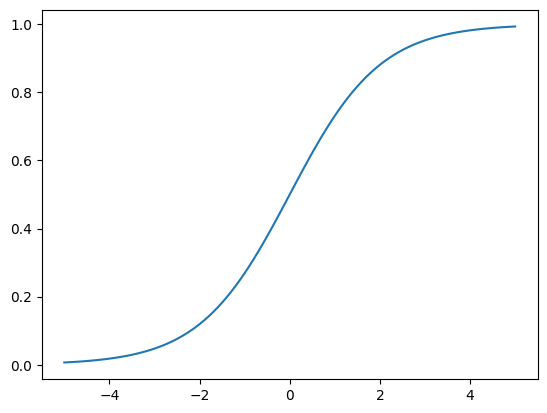

In [3]:
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### Example 3-3. Tanh activation

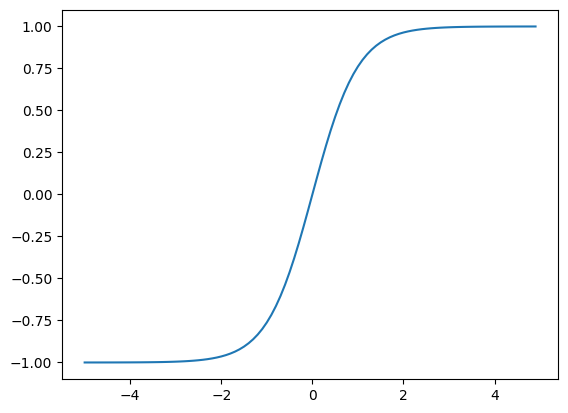

In [4]:
x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### Example 3-4. ReLU activation

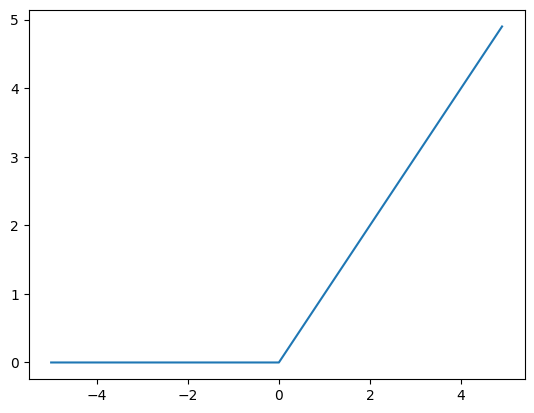

In [5]:
relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

### Parametric ReLU

This activation function is helpful to address the "dying ReLU problem" where the ReLU outputs can become zero and never increase again.

Also known as the Leaky ReLU --> PReLU with a leak coefficient that can be learned

### Example 3-5. PReLU activation

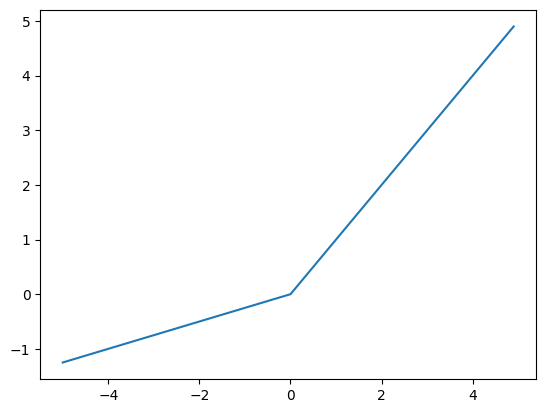

In [6]:
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., 0.1)
y = prelu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### Example 3-6. Softmax activation

In [7]:
softmax = nn.Softmax(dim=1)
x_input = torch.rand(1, 3)
y_output = softmax(x_input)
print(f"x_input: {x_input}")
print(f"y_output: {y_output}")
print(f"torch.sum(y_output, dim=1): {torch.sum(y_output, dim=1)}")

x_input: tensor([[0.3056, 0.7793, 0.2148]])
y_output: tensor([[0.2842, 0.4563, 0.2595]])
torch.sum(y_output, dim=1): tensor([1.])


### Example 3-7. MSE Loss

In [13]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(2.5320, grad_fn=<MseLossBackward0>)


### Example 3-8. Cross-entropy loss

"PyTorch CrossEntropyLoss() assumes that each input has a particular class, and each class has a unique index"

In [15]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
print(f"outputs: {outputs}")
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
print(f"targets: {targets}")
loss = ce_loss(outputs, targets)
print(loss)

outputs: tensor([[-0.6296,  1.6504, -0.9790, -1.2331, -0.8108],
        [ 0.4297,  0.1194, -0.6128,  0.2302,  0.2564],
        [-0.8510,  0.8750,  0.1123,  0.8673, -0.1519]], requires_grad=True)
targets: tensor([1, 0, 3])
tensor(0.8999, grad_fn=<NllLossBackward0>)


### Example 3-9. Binary cross-entropy loss

In [17]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
print(f"probabilities: {probabilities}")
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(f"loss: {loss}")

probabilities: tensor([[0.2662],
        [0.6153],
        [0.4132],
        [0.3265]], grad_fn=<SigmoidBackward0>)
loss: 0.8894329071044922
